<a href="https://colab.research.google.com/github/pranitakhade/CODSOFT/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By: **PRANIT AKHADE**

### **MOVIE RATING PREDICTION WITH PYTHON**

*   Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
*   The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
*   Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.






In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.shape

(15509, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
data.duplicated().sum()

6

In [7]:
data.drop_duplicates(keep = 'first', inplace = True)

In [8]:
data.isna().sum() * 100/ len(data)

Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor 1     10.417339
Actor 2     15.358318
Actor 3     20.254144
dtype: float64

In [9]:
data.dropna(inplace = True, axis = 0)

In [10]:
data['Name'] = data['Name'].str.replace('#','')
data['Year'] = data['Year'].str.replace(r'\(', '', regex=True).str.replace(r'\)', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = data['Duration'].str.replace(" min", '')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',',''), errors='coerce')

In [11]:
split_genres = data['Genre'].str.split(',', expand=True)
split_genres.columns = ['Genre_1', 'Genre_2', 'Genre_3']
split_genres['Genre_2'].fillna(split_genres['Genre_1'], inplace = True)
split_genres.drop('Genre_3', axis = 1, inplace = True)

In [12]:
data.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


In [13]:
data.drop('Genre', axis = 1, inplace = True)
data = pd.concat([data, split_genres], axis = 1)

In [14]:
data['Genre_2'] = data['Genre_2'].str.strip()

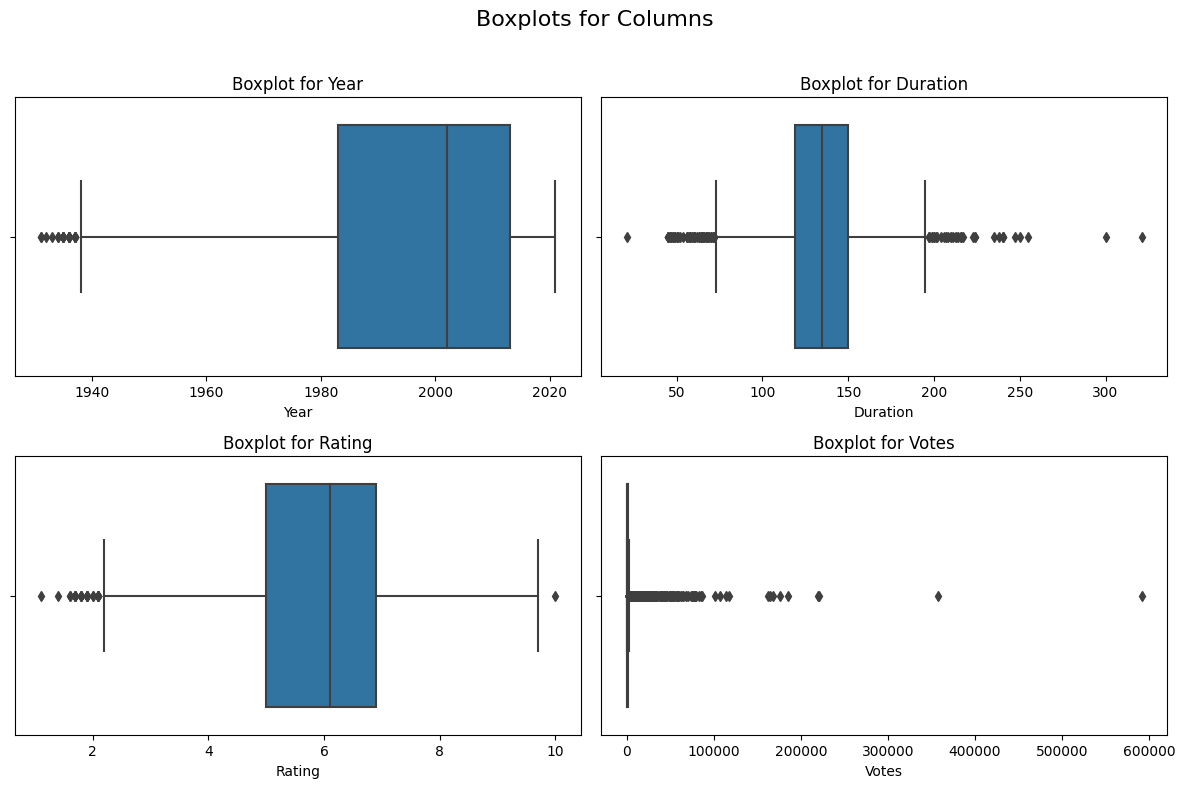

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots for Columns', fontsize=16)

# Boxplot for 'Year'
sns.boxplot(x=data['Year'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for Year')

# Boxplot for 'Duration'
sns.boxplot(x=data['Duration'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot for Duration')

# Boxplot for 'Rating'
sns.boxplot(x=data['Rating'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot for Rating')

# Boxplot for 'Votes'
sns.boxplot(x=data['Votes'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot for Votes')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

In [16]:
col = ['Year', 'Duration', 'Rating', 'Votes']
for i in col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data = data[(data[i] >= lower) & (data[i] <= upper)]

data.shape

(4614, 11)

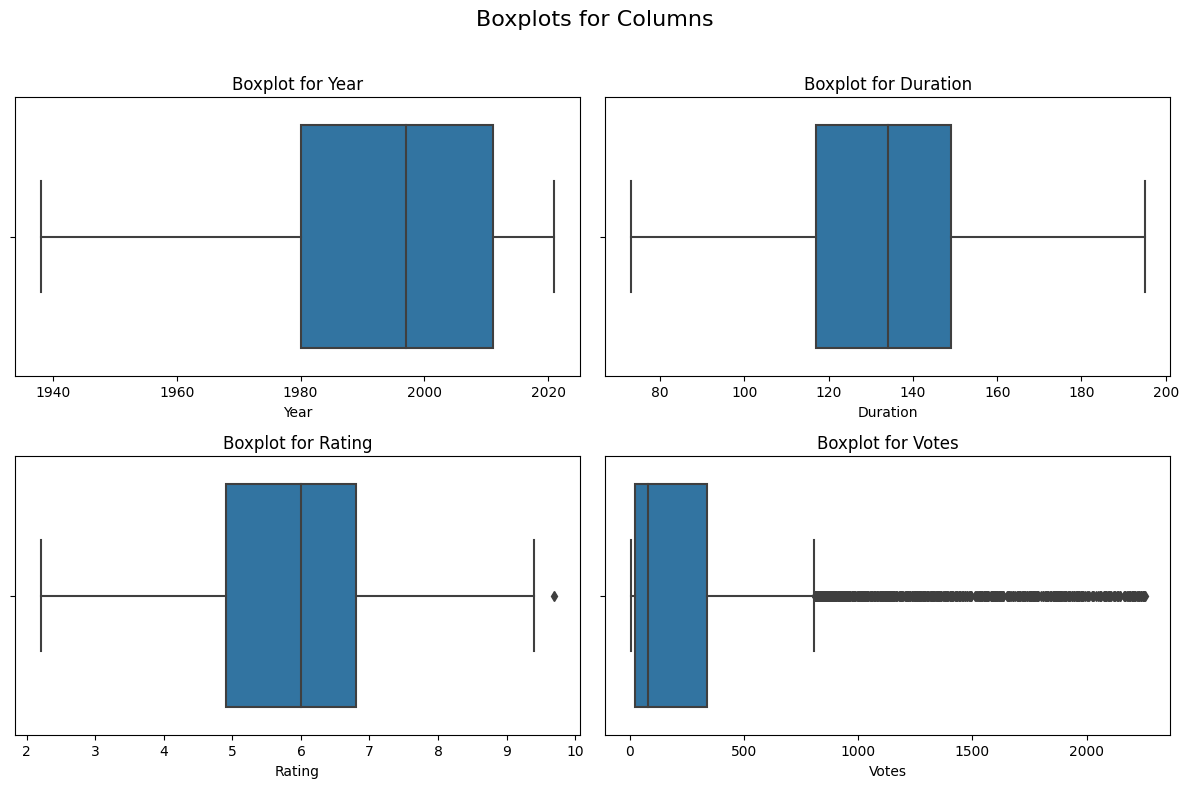

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots for Columns', fontsize=16)

# Boxplot for 'Year'
sns.boxplot(x=data['Year'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot for Year')

# Boxplot for 'Duration'
sns.boxplot(x=data['Duration'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot for Duration')

# Boxplot for 'Rating'
sns.boxplot(x=data['Rating'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot for Rating')

# Boxplot for 'Votes'
sns.boxplot(x=data['Votes'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot for Votes')

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

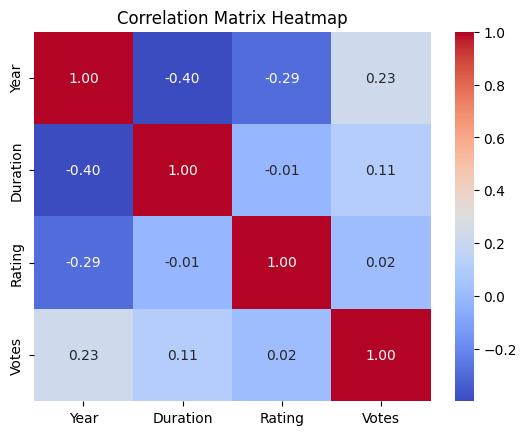

In [18]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

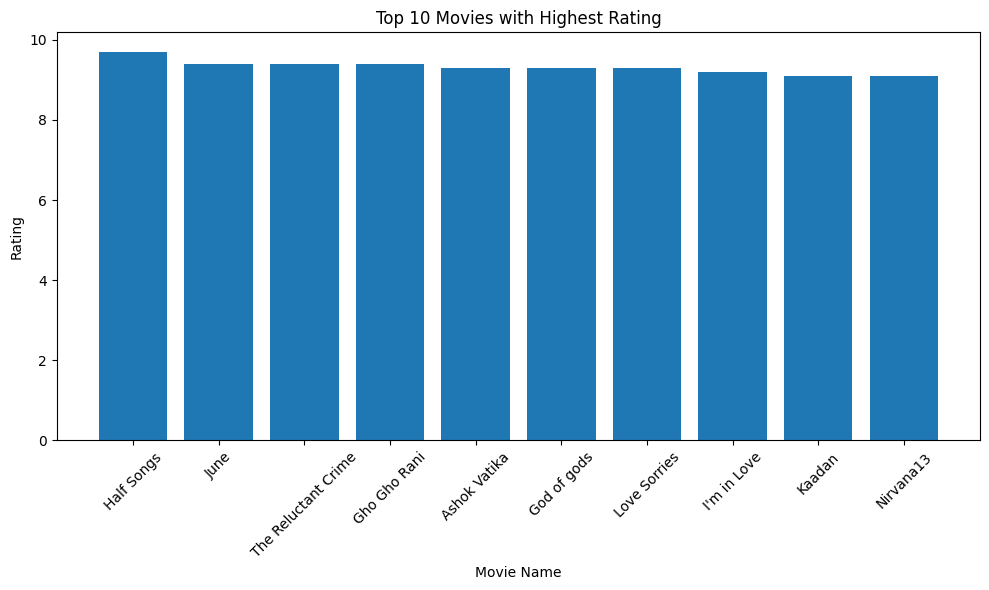

In [19]:
top = data.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top['Name'], top['Rating'])
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.title('Top 10 Movies with Highest Rating')
plt.xticks(rotation=45)  # Rotate movie names for better readability
plt.tight_layout()

plt.show()

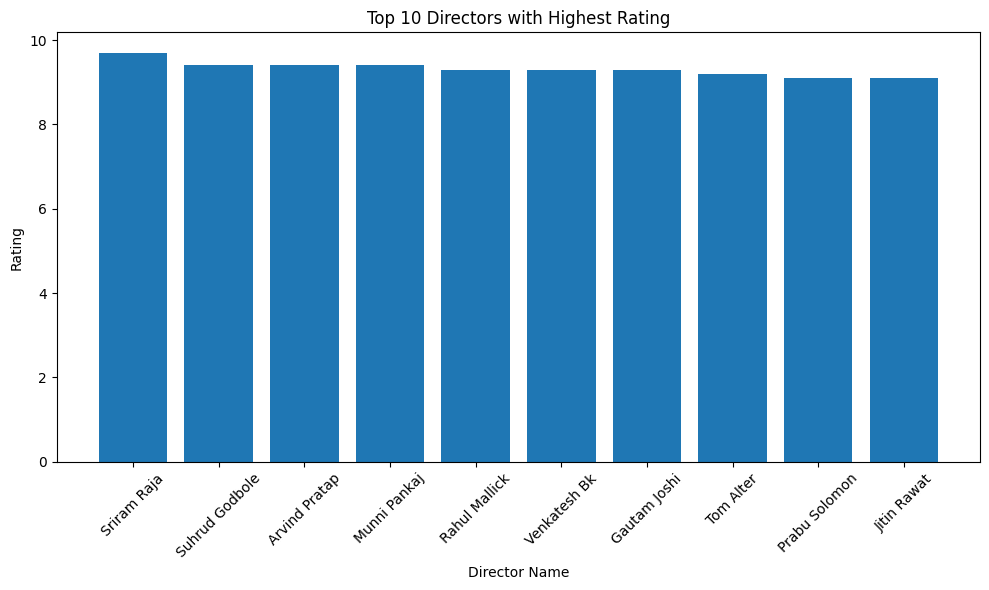

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(top['Director'], top['Rating'])
plt.xlabel('Director Name')
plt.ylabel('Rating')
plt.title('Top 10 Directors with Highest Rating')
plt.xticks(rotation=45)  # Rotate movie names for better readability
plt.tight_layout()

plt.show()

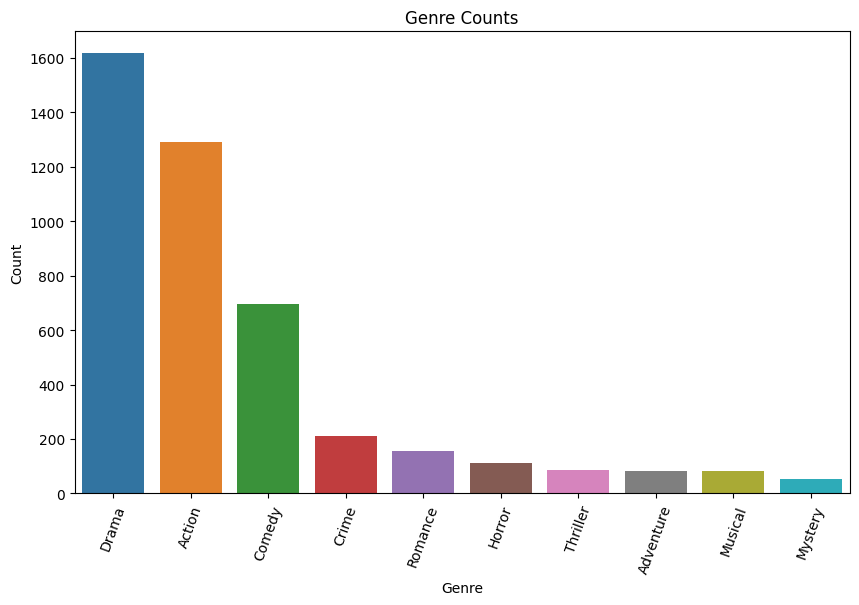

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'Genre_1', order=data['Genre_1'].value_counts().sort_values(ascending = False).head(10).index)
plt.xticks(rotation = 70)
plt.title("Genre Counts")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

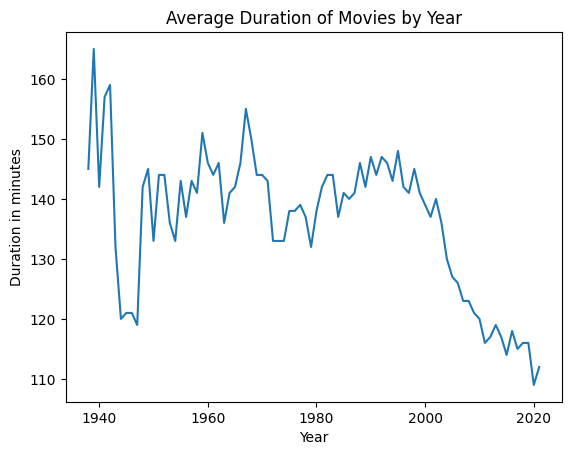

In [22]:
sns.lineplot(x = round(data.groupby(['Year'])['Duration'].mean()).index, y = round(data.groupby(['Year'])['Duration'].mean()).values)
plt.title("Average Duration of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Duration in minutes")
plt.show()

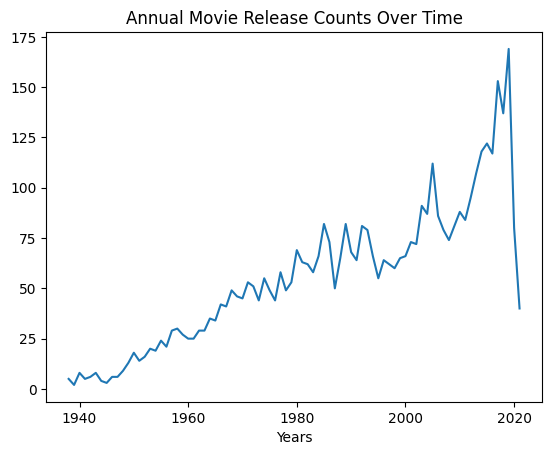

In [23]:
sns.lineplot(x = data['Year'].value_counts().index,y = data['Year'].value_counts().values)
plt.title("Annual Movie Release Counts Over Time")
plt.xlabel("Years")
plt.show()

In [24]:
X = data[['Genre_1', 'Genre_2', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

In [25]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Genre_1', 'Genre_2', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [27]:
# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared : {r2}')

Mean Absolute Error: 0.9352520585048756
Mean Squared Error: 1.5141261482114492
Root Mean Squared Error: 1.2304983332826782
R-squared : 0.22061386760289436
